In [19]:

quiz_data = requests.get(quiz_url).json()
history_data = requests.get(history_url).json()
score_data = requests.get(score_url).json()


print("Quiz Data Structure:", type(quiz_data))
if isinstance(quiz_data, dict):
    print("Quiz Data Keys:", quiz_data.keys()) 

print("History Data Structure:", type(history_data))
if isinstance(history_data, dict):
    print("History Data Keys:", history_data.keys())  
print("Score Data Structure:", type(score_data))
if isinstance(score_data, dict):
    print("Score Data Keys:", score_data.keys())  


Quiz Data Structure: <class 'dict'>
Quiz Data Keys: dict_keys(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score', 'negative_score', 'correct_answers', 'incorrect_answers', 'source', 'type', 'started_at', 'ended_at', 'duration', 'better_than', 'total_questions', 'rank_text', 'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz', 'next_steps'])
History Data Structure: <class 'list'>
Score Data Structure: <class 'dict'>
Score Data Keys: dict_keys(['quiz'])


In [20]:
import requests
import pandas as pd

quiz_url = "https://api.jsonserve.com/rJvd7g"
history_url = "https://api.jsonserve.com/XgAgFJ"
score_url = "https://www.jsonkeeper.com/b/LLQT"

quiz_data = requests.get(quiz_url).json()
history_data = requests.get(history_url).json()
score_data = requests.get(score_url).json()

print("Quiz Data Structure:", type(quiz_data))
if isinstance(quiz_data, dict):
    print("Quiz Data Keys:", quiz_data.keys())  

print("History Data Structure:", type(history_data))
if isinstance(history_data, list):
    print(f"First 3 entries in History Data: {history_data[:3]}")  

print("Score Data Structure:", type(score_data))
if isinstance(score_data, dict):
    print("Score Data Keys:", score_data.keys())  

history_df = pd.DataFrame(history_data)

quiz_df = pd.DataFrame({
    'accuracy': [quiz_data['accuracy']],
    'score': [quiz_data['score']],
    'final_score': [quiz_data['final_score']],
    'correct_answers': [quiz_data['correct_answers']],
    'incorrect_answers': [quiz_data['incorrect_answers']],
    'response_map': [quiz_data['response_map']],
})

print("History DataFrame:")
print(history_df.head())

print("Quiz DataFrame:")
print(quiz_df.head())



Quiz Data Structure: <class 'dict'>
Quiz Data Keys: dict_keys(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score', 'negative_score', 'correct_answers', 'incorrect_answers', 'source', 'type', 'started_at', 'ended_at', 'duration', 'better_than', 'total_questions', 'rank_text', 'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz', 'next_steps'])
History Data Structure: <class 'list'>
First 3 entries in History Data: [{'id': 336497, 'quiz_id': 51, 'user_id': 'YcDFSO4ZukTJnnFMgRNVwZTE4j42', 'submitted_at': '2025-01-17T15:30:18.027+05:30', 'created_at': '2025-01-17T15:30:18.044+05:30', 'updated_at': '2025-01-17T15:30:18.044+05:30', 'score': 108, 'trophy_level': 2, 'accuracy': '90 %', 'speed': '100', 'final_score': '105.0', 'negative_score': '3.0', 'correct_answers': 27, 'incorrect_answers': 3, 'source': 'exam', 'type': 'topic', 'started_at': '2025-01-17T15:18:30.000+05:30', 'ended_at': '2025-01-

In [24]:
print(history_df.columns)

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')


In [25]:
history_df.columns = history_df.columns.str.strip()  


quiz_performance = history_df.groupby('quiz_id').agg(
    total_score=('score', 'sum'),
    average_score=('score', 'mean'),
    average_accuracy=('accuracy', lambda x: x.str.rstrip(' %').astype(float).mean()),  # Convert accuracy to numeric for aggregation
    total_correct_answers=('correct_answers', 'sum'),
    total_incorrect_answers=('incorrect_answers', 'sum'),
    total_questions=('total_questions', 'sum'),  # Sum of total questions attempted per quiz
    total_mistakes_corrected=('mistakes_corrected', 'sum')
).reset_index()


print("Quiz Performance Summary:")
print(quiz_performance)


Quiz Performance Summary:
   quiz_id  total_score  average_score  average_accuracy  \
0        6          164      54.666667         80.000000   
1       18          104      52.000000         92.000000   
2       20           12      12.000000         30.000000   
3       24           76      76.000000        100.000000   
4       25          112     112.000000         93.000000   
5       50           24      24.000000         66.000000   
6       51          260      86.666667         72.333333   
7       57           40      40.000000         38.000000   
8       58           52      52.000000         43.000000   

   total_correct_answers  total_incorrect_answers  total_questions  \
0                     41                       10               69   
1                     26                        3               44   
2                      3                        7               59   
3                     19                        0               20   
4                     2

In [26]:
import pandas as pd

weaknesses = []

for index, row in quiz_performance.iterrows():
    weaknesses_summary = {
        "quiz_id": row['quiz_id'],
        "weaknesses": [],
        "recommendations": []
    }
    
  
    if row['average_accuracy'] < 60:
        weaknesses_summary['weaknesses'].append("Low Accuracy")
        weaknesses_summary['recommendations'].append("Review the question difficulty level or provide additional study material.")
    
   
    if row['total_correct_answers'] < 10:
        weaknesses_summary['weaknesses'].append("Low Number of Correct Answers")
        weaknesses_summary['recommendations'].append("Ensure that questions are clear and not misleading.")
    
    if row['total_incorrect_answers'] > row['total_correct_answers']:
        weaknesses_summary['weaknesses'].append("High Number of Incorrect Answers")
        weaknesses_summary['recommendations'].append("Provide feedback on incorrect answers to help students learn.")
    
    if row['average_score'] < (row['total_questions'] * 0.4):
        weaknesses_summary['weaknesses'].append("Low Average Score")
        weaknesses_summary['recommendations'].append("Reduce the difficulty or consider giving more time for completion.")
    
    if row['total_mistakes_corrected'] < 5:
        weaknesses_summary['weaknesses'].append("Low Number of Mistakes Corrected")
        weaknesses_summary['recommendations'].append("Encourage users to review and correct mistakes for improvement.")
    
    weaknesses.append(weaknesses_summary)

weaknesses_df = pd.DataFrame(weaknesses)

print(weaknesses_df[['quiz_id', 'weaknesses', 'recommendations']])


   quiz_id                                         weaknesses  \
0      6.0                 [Low Number of Mistakes Corrected]   
1     18.0                 [Low Number of Mistakes Corrected]   
2     20.0  [Low Accuracy, Low Number of Correct Answers, ...   
3     24.0                 [Low Number of Mistakes Corrected]   
4     25.0                                                 []   
5     50.0  [Low Number of Correct Answers, Low Average Sc...   
6     51.0                                [Low Average Score]   
7     57.0  [Low Accuracy, High Number of Incorrect Answer...   
8     58.0  [Low Accuracy, High Number of Incorrect Answer...   

                                     recommendations  
0  [Encourage users to review and correct mistake...  
1  [Encourage users to review and correct mistake...  
2  [Review the question difficulty level or provi...  
3  [Encourage users to review and correct mistake...  
4                                                 []  
5  [Ensure that que

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

history_df['accuracy'] = history_df['accuracy'].replace('%', '', regex=True).astype(float)

quiz_performance = history_df.groupby('quiz_id').agg(
    total_score=('score', 'sum'),
    average_score=('score', 'mean'),
    average_accuracy=('accuracy', 'mean'),
    total_correct_answers=('correct_answers', 'sum'),
    total_incorrect_answers=('incorrect_answers', 'sum'),
    total_questions=('total_questions', 'mean'),
    total_mistakes_corrected=('mistakes_corrected', 'sum')
).reset_index()

good_performance_threshold = 80
poor_performance_threshold = 60
high_accuracy_threshold = 80
high_incorrect_answers_threshold = 10

quiz_performance['Performance'] = quiz_performance.apply(
    lambda row: 'Good' if row['average_score'] >= good_performance_threshold and row['average_accuracy'] >= high_accuracy_threshold 
    else ('Poor' if row['average_score'] < poor_performance_threshold or row['total_incorrect_answers'] > high_incorrect_answers_threshold
          else 'Average'), axis=1
)

user_performance_summary = history_df.groupby('user_id').agg(
    quizzes_to_focus_on=('quiz_id', list),
    average_score=('score', 'mean'),
    average_accuracy=('accuracy', 'mean'),
    total_correct_answers=('correct_answers', 'sum'),
    total_incorrect_answers=('incorrect_answers', 'sum')
).reset_index()

user_performance_summary['Persona'] = user_performance_summary.apply(
    lambda row: 'Intermediate Performer' if row['average_score'] < good_performance_threshold else 'Strong Performer', axis=1
)

user_performance_summary['Recommendations'] = user_performance_summary.apply(
    lambda row: f"Focus on quizzes {row['quizzes_to_focus_on']} to improve accuracy and understanding." if row['average_accuracy'] < high_accuracy_threshold 
    else "You're doing well! Keep up the good work.", axis=1
)

print("Quiz Performance Summary:")
print(quiz_performance)

print("\nUser Performance Summary:")
print(user_performance_summary)

quiz_performance.to_csv("quiz_performance.csv", index=False)
user_performance_summary.to_csv("user_performance_summary.csv", index=False)


Quiz Performance Summary:
   quiz_id  total_score  average_score  average_accuracy  \
0        6          164      54.666667         80.000000   
1       18          104      52.000000         92.000000   
2       20           12      12.000000         30.000000   
3       24           76      76.000000        100.000000   
4       25          112     112.000000         93.000000   
5       50           24      24.000000         66.000000   
6       51          260      86.666667         72.333333   
7       57           40      40.000000         38.000000   
8       58           52      52.000000         43.000000   

   total_correct_answers  total_incorrect_answers  total_questions  \
0                     41                       10             23.0   
1                     26                        3             22.0   
2                      3                        7             59.0   
3                     19                        0             20.0   
4                     2

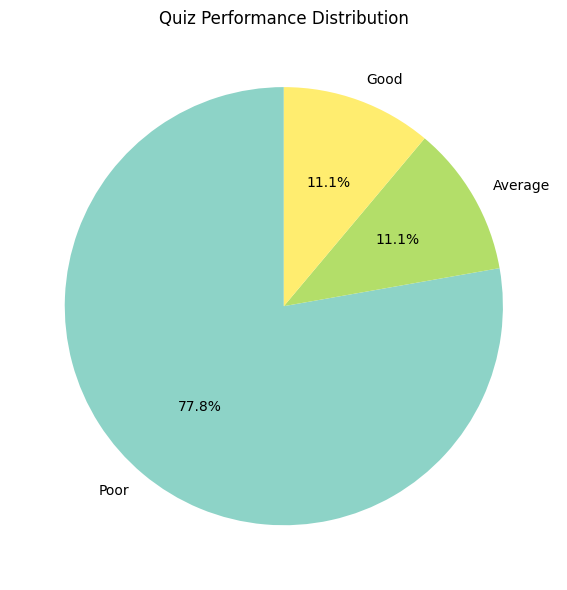

In [34]:

performance_counts = quiz_performance['Performance'].value_counts()
plt.figure(figsize=(6, 6))
performance_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Quiz Performance Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

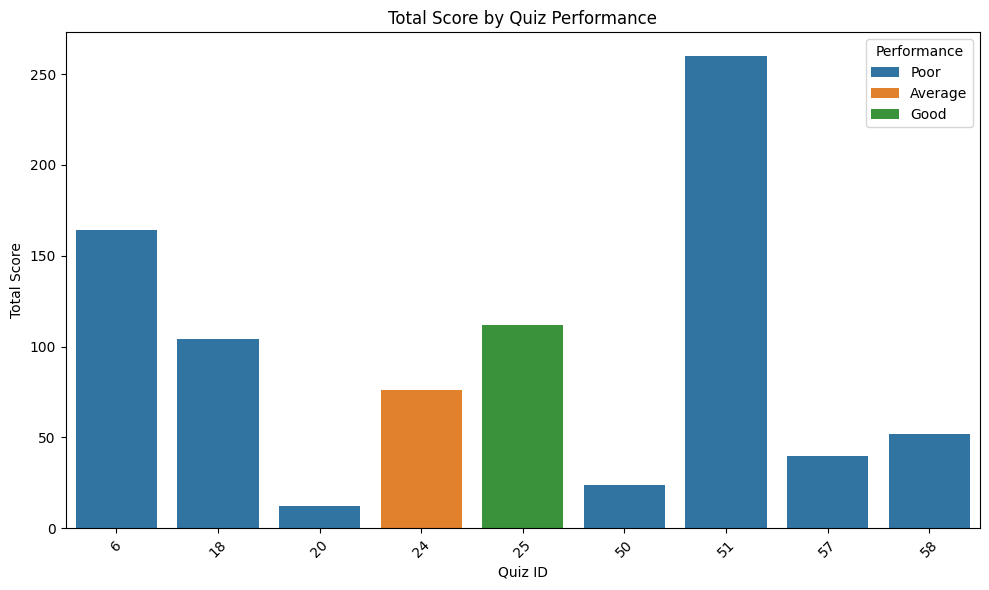

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quiz_id', y='total_score', hue='Performance', data=quiz_performance)
plt.title("Total Score by Quiz Performance")
plt.xlabel("Quiz ID")
plt.ylabel("Total Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

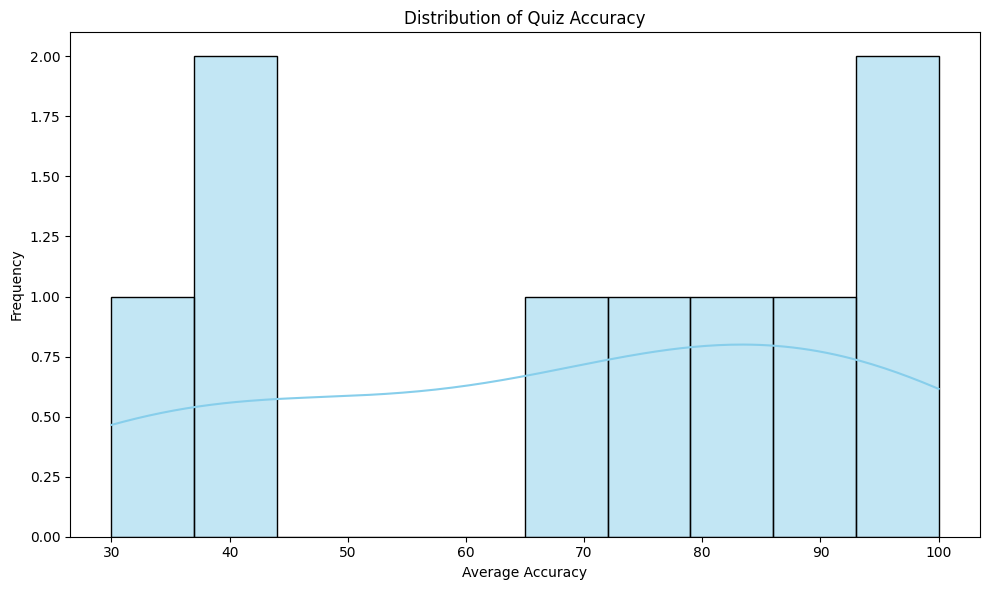

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(quiz_performance['average_accuracy'], kde=True, bins=10, color='skyblue')
plt.title("Distribution of Quiz Accuracy")
plt.xlabel("Average Accuracy")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

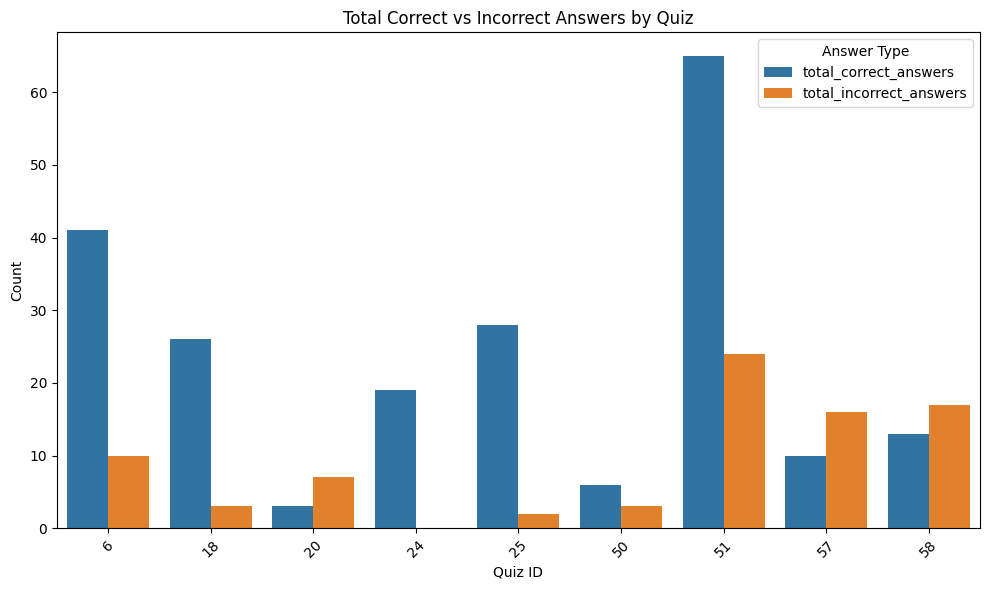

In [38]:
quiz_performance_melted = quiz_performance.melt(id_vars=['quiz_id'], 
                                                value_vars=['total_correct_answers', 'total_incorrect_answers'],
                                                var_name='Answer Type', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='quiz_id', y='Count', hue='Answer Type', data=quiz_performance_melted)
plt.title("Total Correct vs Incorrect Answers by Quiz")
plt.xlabel("Quiz ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()